In [1]:
import torch

from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import pytorch_lightning as pl

In [2]:
batch_size = 64

In [3]:
train_data = datasets.MNIST(root="mnist_data", train=True, download=True, transform=ToTensor())
test_data = datasets.MNIST(root="mnist_data", train=False, download=True, transform=ToTensor())
train_dataloader = DataLoader(train_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [4]:
class MyModel(pl.LightningModule):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
    def training_step(self, batch, batch_idx):
        X, y = batch
        logits = self(X)
        loss = F.cross_entropy(logits, y)
        return loss
    
    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        return optimizer

In [5]:
model = MyModel()

In [6]:
model

MyModel(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [7]:
trainer = pl.Trainer(max_epochs=10, gpus=1)
trainer.fit(model, train_dataloader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name              | Type       | Params
-------------------------------------------------
0 | flatten           | Flatten    | 0     
1 | linear_relu_stack | Sequential | 235 K 
-------------------------------------------------
235 K     Trainable params
0         Non-trainable params
235 K     Total params
0.941     Total estimated model params size (MB)
C:\Users\SeonghanRyu\anaconda3\lib\site-packages\pytorch_lightning\trainer\data_loading.py:116: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

In [8]:
test_size = len(test_dataloader.dataset)
num_batches = len(test_dataloader)
model.eval()
test_loss, correct = 0, 0

with torch.no_grad():
    for X, y in test_dataloader:
        pred = model(X)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

correct /= test_size
print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}% \n")

Test Error: 
 Accuracy: 98.0% 



In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
img, label = test_data[0]

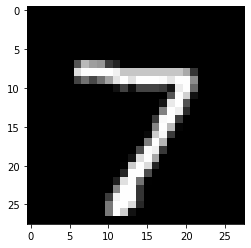

In [11]:
plt.imshow(img.squeeze(), cmap='gray')

In [12]:
label

7

In [13]:
logits = model(img)

In [14]:
logits.argmax(1)

tensor([7])